### Load Libraries

In [3]:
import tweepy  #another popular twitter API wrapper
import json
import config   #twitter OAuth configuration
import datetime
import pylib
import utils
import python_utils
from datetime import datetime
from dateutil import tz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib2
import csv
import time

### Input Authorization Details

In [4]:
# the authentication process for tweepy
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.oauth_token, config.oauth_token_secret)
api = tweepy.API(auth)

### Parse Top 50 Tweets Tesla's Twitter Handle

In [5]:
tweets = api.user_timeline(id="TeslaMotors",count=50)  

### Transform And Clean Data Into Dataframe

In [6]:
df = pd.DataFrame()

df['Tweet'] = [t.text for t in tweets]
df['Retweet_Count'] = [t.retweet_count for t in tweets]
df['Source'] = [t.source for t in tweets]
df['Favorite_Count'] = [t.favorite_count for t in tweets]

# from_zone = tz.tzutc()
# to_zone = tz.tzlocal()
df['Created_At'] = [t.created_at.replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()) for t in tweets]

### Parse Url's and Hastags

In [7]:
df['Urls'] = np.nan
df['Hashtags'] = np.nan

df['Url_Count'] = np.nan
df['Hashtag_Count'] = np.nan

count = 0

for t in tweets:
    urls = [url['url'] for url in t.entities['urls']]
    hashtags = [hashtag['text'] for hashtag in t.entities['hashtags']]
    
    df['Url_Count'][count] = len(urls)
    df['Hashtag_Count'][count] = len(hashtags)  
        
    df['Urls'][count] = ','.join(urls)
    df['Hashtags'][count] = ','.join(hashtags)
    
    count+=1

C:\Users\Arpit Sidana\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Arpit Sidana\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Arpit Sidana\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Arpit Sidana\Anaconda2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be se

In [8]:
df.head()

,Tweet,Retweet_Count,Source,Favorite_Count,Created_At,Urls,Hashtags,Url_Count,Hashtag_Count
0,Supercharger availability is now displayed on ...,1203,Twitter Web Client,6693,2017-02-09 17:19:19-06:00,https://t.co/zhQcx256cD,,1.0,0.0
1,RT @MotorTrend: 0-60 mph is 2.28 seconds! The ...,905,Twitter Web Client,0,2017-02-07 09:01:08-06:00,,Tesla,0.0,1.0
2,Lithuania knows the way to our heart: a Gigafa...,1592,Twitter Web Client,3702,2017-02-03 15:11:29-06:00,https://t.co/V5COhmMkdu,,1.0,0.0
3,RT @elonmusk: Regarding the meeting at the Whi...,25640,Twitter Web Client,0,2017-02-02 19:43:44-06:00,,,0.0,0.0
4,Meet the utility grid of the future. Tesla's P...,3260,Twitter Web Client,7481,2017-01-30 12:03:21-06:00,https://t.co/0IWoAoMNYO,,1.0,0.0


### Wordcloud 

In [9]:
from wordcloud import WordCloud,STOPWORDS
text = (' '.join(list(df['Tweet'])))

In [10]:
text

u'Supercharger availability is now displayed on your Tesla touchscreen so you can see how many stalls are open before\u2026 https://t.co/zhQcx256cD RT @MotorTrend: 0-60 mph is 2.28 seconds! The @TeslaMotors Model S P100D is the quickest car we\u2019ve ever tested. #Tesla @elonmusk  https://t\u2026 Lithuania knows the way to our heart: a Gigafactory 2 pitch using Minecraft. https://t.co/V5COhmMkdu RT @elonmusk: Regarding the meeting at the White House: https://t.co/8b1XH4oW6h Meet the utility grid of the future. Tesla\'s Powerpack installation at @SCE\'s substation will reduce the LA Basin\'s\u2026 https://t.co/0IWoAoMNYO RT @elonmusk: Many people negatively affected by this policy are strong supporters of the US. They\'ve done right,not wrong &amp; don\'t deserve\u2026 RT @elonmusk: The blanket entry ban on citizens from certain primarily Muslim countries is not the best way to address the country\u2019s challe\u2026 Honored to receive Best Car Award for the third year in a row in Germ

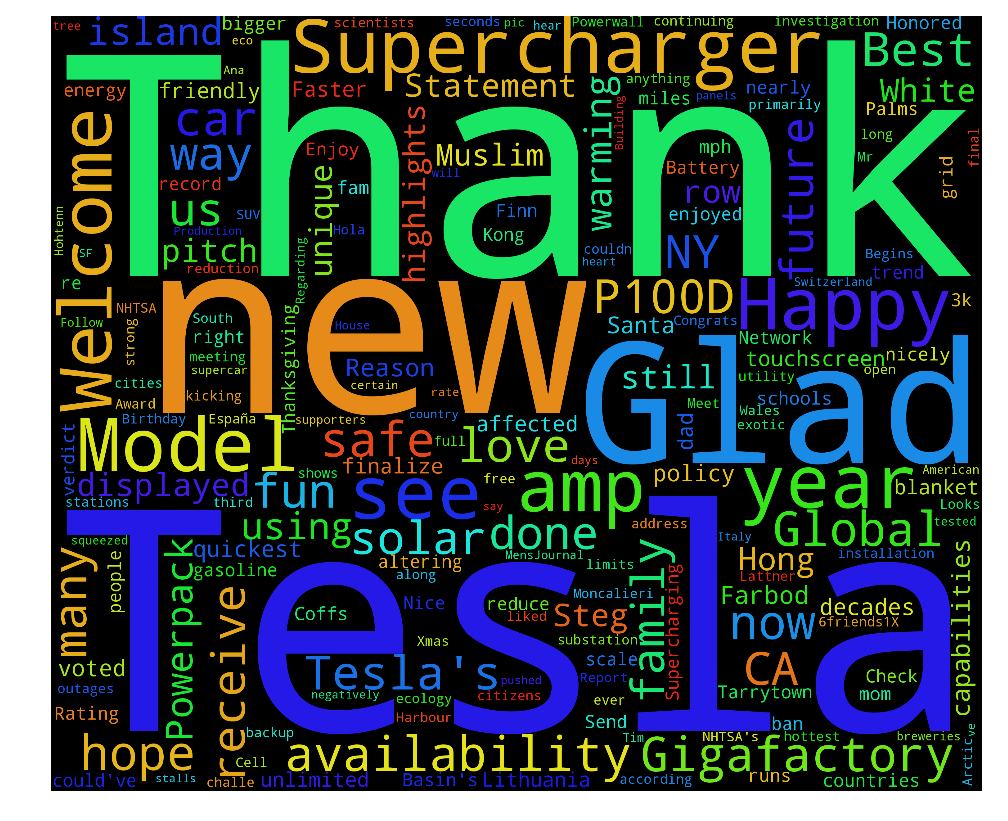

In [11]:
cleaned_word = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()